# Introduction to text indexing techniques
See the extracted dataset sample [here](https://unimi2013.sharepoint.com/:u:/s/InformationRetrieval/EaL7kid2qzdCmAA8RO-m5iQBsvCl5cuNIdn0rsJN1FUhSg?e=fdXkkB)

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
import os
import nltk

In [3]:
from collections import defaultdict, Counter

In [4]:
folder = "/Users/flint/Data/recipe/text-sample/"
files = [f for f in os.listdir(folder) if f.endswith('.txt')]
recipes = []
for file in files:
    with open(os.path.join(folder, file), 'r') as data:
        recipes.append(data.read())

In [5]:
from string import punctuation

In [7]:
print(recipes[0])

Curried Couscous with Broccoli and Feta


Ingredients


 - 1 3/4 cup of water, bottled, generic


 - 1 cup of couscous, dry


 - 1 1/2 cup of broccoli, raw


 - 1/2 cup of fresh red onions, upc: 888670013229


 - 13 cup of carrots, raw


 - 1/4 cup of raisins, seeded


 - 1/4 cup of nuts, cashew nuts, raw


 - 2 tablespoon of vinegar, red wine


 - 1 1/2 teaspoon of oil, olive, salad or cooking


 - 1 tablespoon of sugars, granulated


 - 1 1/2 teaspoon of spices, curry powder


 - 1 teaspoon of spices, ginger, ground


 - 3/4 teaspoon of salt, table


 - 15 ounce of chickpeas (garbanzo beans, bengal gram), mature seeds, raw


 - 3 ounce of cheese, feta


Instructions: 

Bring 1 3/4 cups water to a boil in a medium saucepan; gradually stir in couscous. Remove from heat; cover and let stand 5 minutes. Fluff with a fork. While couscous stands, steam broccoli florets, covered, for 3 minutes or until tender. Combine couscous, broccoli, onion, and next 10 ingredients (onion through chickpea

In [9]:
nltk_tokenize = lambda text: [x.lower() for x in nltk.word_tokenize(text) if x not in punctuation]

In [12]:
len(recipes)

10000

In [13]:
s = 'This is a sentence for a test'
nltk_tokenize(s)

['this', 'is', 'a', 'sentence', 'for', 'a', 'test']

## Bag of words and Inverted Index
The occurrences of words in a corpus can be represented by the *document-term* matrix, a matrix $T^{docs \times vocabulary}$. Howevere, such a matrix is sparse and has a huge dimensionality. We can address this issue by supporting data structures.

**BOW**
```
doc_id: {w: frequency, ...}
```
**Inverted Index**
```
w: [doc_id, ...]
```
**Rich inverted Index**
```
w: [(doc_id, position, freq, ...), ...]
```

In [19]:
BOW = defaultdict(lambda: defaultdict(lambda: 0))
I = defaultdict(set)

In [20]:
corpus = list(enumerate(recipes))
for i, document in tqdm(corpus):
    tokens = nltk_tokenize(document.lower())
    for token in tokens:
        BOW[i][token] += 1
        I[token].add(i)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [24]:
list(BOW[0].items())[:10]

[('curried', 1),
 ('couscous', 5),
 ('with', 3),
 ('broccoli', 4),
 ('and', 3),
 ('feta', 2),
 ('ingredients', 2),
 ('1', 8),
 ('3/4', 3),
 ('cup', 7)]

In [25]:
list(I['couscous'])[:10]

[0, 1154, 2196, 9239, 8983, 537, 7711, 7733, 7230, 7490]

In [28]:
len(I['a'])

7981

### To document-term Matrix

In [29]:
T = pd.DataFrame(BOW).fillna(0, inplace=False).T

In [30]:
T.head()

,curried,couscous,with,broccoli,and,feta,ingredients,1,3/4,cup,...,armless,legless,'injury,scary,skeleton,xmas,stained,breal,scoup,and/
0,1.0,5.0,3.0,4.0,3.0,2.0,2.0,8.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,3.0,0.0,1.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,3.0,0.0,2.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
T.shape

(10000, 15488)

## Naive IR

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

In [71]:
q = 'pasta with broccoli and cheese and parmesan'
V = list(T.columns)
qv = np.zeros(len(V))
for token in nltk_tokenize(q):
    try:
        word_index = V.index(token)
        qv[word_index] += 1
    except ValueError:
        pass

In [74]:
Sigma = cosine_similarity(qv.reshape(1, -1), T)

In [75]:
answers = sorted(enumerate(Sigma[0]), key=lambda x: -x[1])

In [76]:
print(corpus[answers[0][0]][1])

Fettuccine Greta Garbo


Ingredients


 - 16 ounce of kashi, steam meal, chicken fettuccine, frozen entree


 - 6 tablespoon of butter, without salt


 - 4 teaspoon of spices, garlic powder


 - 1 1/2 cup of cream, fluid, heavy whipping


 - 1 cup of cheese, parmesan, hard


 - 1 1/2 cup of onions, spring or scallions (includes tops and bulb), raw


Instructions: 

Bring large pot of water to boil over high heat. When water is boiling, drop in pasta and boil until al dente. Drain and set aside. In a large pot over medium-high heat, heat butter and garlic. Stir and cook until butter has melted and garlic is aromatic. Add cooked pasta and smoked salmon. Using a fork or pasta tongs, stir until pasta and salmon are hot and well mixed. Add heavy cream. Cook, stirring frequently, until cream begins to thicken. Stir in Parmesan cheese and green onions. Transfer to serving dish and serve at once, with additional cheese if you like.


## Word relevance
Take the top 5 relevant words for document 0. What problems do you see in there?

In [77]:
print(sorted(BOW[0].items(), key=lambda x: -x[1])[:5], sum(BOW[0].values()))
print(sorted(BOW[1].items(), key=lambda x: -x[1])[:5], sum(BOW[1].values()))

[('of', 15), ('1', 8), ('cup', 7), ('couscous', 5), ('broccoli', 4)] 163
[('g', 8), ('of', 7), ('rice', 5), ('cup', 4), ('teriyaki', 3)] 142


### Term Frequency (TF)

In [78]:
def tf(term, bow):
    return 0.5 + (0.5 * bow[term] / max(bow.values()))

In [83]:
tfBOW0 = [(w, tf(w, BOW[0])) for w in BOW[0].keys()]

In [86]:
print(sorted([(w, tf(w, BOW[0])) for w in BOW[0].keys()], key=lambda x: -x[1])[:5])
print(sorted([(w, tf(w, BOW[1])) for w in BOW[1].keys()], key=lambda x: -x[1])[:5])

[('of', 1.0), ('1', 0.7666666666666666), ('cup', 0.7333333333333334), ('couscous', 0.6666666666666666), ('broccoli', 0.6333333333333333)]
[('g', 1.0), ('of', 0.9375), ('rice', 0.8125), ('cup', 0.75), ('teriyaki', 0.6875)]


### Inverse Document Frequency (IDF)

In [102]:
def idf(word):
    df = len(I[word])
    if df >= 10:
        return np.log(len(I) / len(I[word]))
    else:
        return 0

In [103]:
idf_list = pd.Series(dict([(w, idf(w)) for w in V]))

In [105]:
idf_list.sort_values(ascending=True).iloc[:10]

disposable         0.0
plastic-covered    0.0
1/8-1/4            0.0
welsh              0.0
cyflaith           0.0
cupful             0.0
fare               0.0
s.                 0.0
minwel             0.0
tibbott            0.0
dtype: float64

### TfIdf

In [106]:
def tfidf(word, bow):
    return tf(word, bow)*idf(word)

In [107]:
print(sorted([(w, tfidf(w, BOW[0])) for w in BOW[0].keys()], key=lambda x: -x[1])[:5])
print(sorted([(w, tfidf(w, BOW[1])) for w in BOW[1].keys()], key=lambda x: -x[1])[:5])

[('couscous', 4.434725690641578), ('chickpeas', 3.74186907734933), ('bengal', 3.7380071892805864), ('gram', 3.6667904465475076), ('curried', 3.547780552513262)]
[('teriyaki', 4.36698896116452), ('nutrition', 4.029139214847201), ('carbohydrate', 3.9424294574443683), ('0', 3.663183708892805), ('points', 3.5729909682255165)]


### TfIdf by scikit-learn

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
vectorizer = TfidfVectorizer(tokenizer=nltk_tokenize)
X = vectorizer.fit_transform(recipes)

In [110]:
X.shape

(10000, 15488)

In [111]:
type(X)

scipy.sparse.csr.csr_matrix

In [113]:
vocabulary = list(vectorizer.get_feature_names_out())

In [117]:
vocabulary.index('broccoli')

3146

In [118]:
X[0,3146]

0.3338017719350585

In [119]:
vectorizer.inverse_transform(X)[0]

array(['sprinkle', 'gently', 'tossing', 'through', '10', 'next', 'onion',
       'combine', 'tender', 'until', 'for', 'covered', 'florets', 'steam',
       'stands', 'while', 'fork', 'fluff', 'minutes', '5', 'stand', 'let',
       'cover', 'heat', 'from', 'remove', 'stir', 'gradually', 'saucepan',
       'medium', 'in', 'boil', 'a', 'to', 'cups', 'bring', 'instructions',
       'cheese', '3', 'seeds', 'mature', 'gram', 'bengal', 'beans',
       'garbanzo', 'chickpeas', 'ounce', '15', 'table', 'salt', 'ground',
       'ginger', 'powder', 'curry', 'spices', 'granulated', 'sugars',
       'cooking', 'or', 'salad', 'olive', 'oil', 'teaspoon', 'wine',
       'vinegar', 'tablespoon', '2', 'cashew', 'nuts', 'seeded',
       'raisins', '1/4', 'carrots', '13', '888670013229', 'upc', 'onions',
       'red', 'fresh', 'raw', '1/2', 'dry', 'generic', 'bottled', 'water',
       'of', 'cup', '3/4', '1', 'ingredients', 'feta', 'and', 'broccoli',
       'with', 'couscous', 'curried'], dtype='<U68')

In [120]:
X[0,vocabulary.index('cup')]

0.12518473412296516

In [121]:
print(sorted(enumerate(X[0].toarray()[0]), key=lambda x: -x[1])[:5])
print(sorted(enumerate(X[1].toarray()[0]), key=lambda x: -x[1])[:5])

[(4478, 0.5547137362904004), (3146, 0.3338017719350585), (9769, 0.2322300123027861), (3774, 0.22044504867573123), (5946, 0.20519600598331877)]
[(6475, 0.47094783273660906), (13917, 0.30170042541839387), (11650, 0.27510428171106444), (9031, 0.23432274040765996), (2658, 0.19811661337308573)]


In [122]:
print([(vocabulary[w], s) for w, s in sorted(enumerate(X[0].toarray()[0]), key=lambda x: -x[1])[:5]])
print([(vocabulary[w], s) for w, s in sorted(enumerate(X[1].toarray()[0]), key=lambda x: -x[1])[:5]])

[('couscous', 0.5547137362904004), ('broccoli', 0.3338017719350585), ('of', 0.2322300123027861), ('chickpeas', 0.22044504867573123), ('feta', 0.20519600598331877)]
[('g', 0.47094783273660906), ('teriyaki', 0.30170042541839387), ('rice', 0.27510428171106444), ('mg', 0.23432274040765996), ('beef', 0.19811661337308573)]


## Vector Space Visualization

In [123]:
import matplotlib.pyplot as plt

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca = PCA(n_components=2)

In [126]:
Xa = pca.fit_transform(X.toarray())

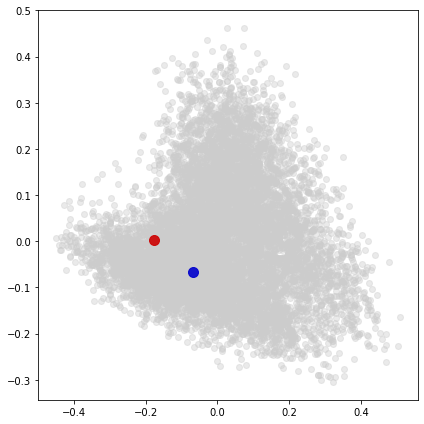

In [127]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(Xa[:,0], Xa[:,1], alpha=0.4, c='#cccccc')
ax.scatter(Xa[0,0], Xa[0,1], alpha=0.9, c='#cc0000', s=100)
ax.scatter(Xa[1,0], Xa[1,1], alpha=0.9, c='#0000cc', s=100)
plt.tight_layout()
plt.show()

## Query

In [128]:
query = 'teriyaki rice'
q = vectorizer.transform([query]).toarray()

In [129]:
qa = pca.transform(q)

In [130]:
qa

array([[-0.06557167, -0.11682313]])

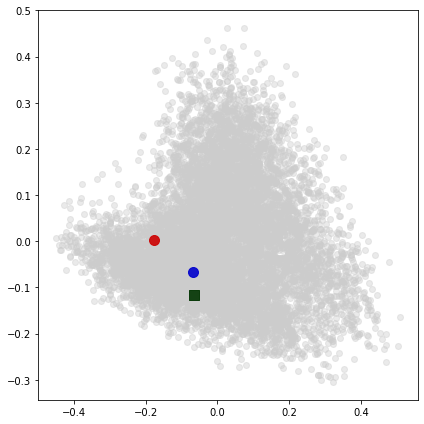

In [131]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(Xa[:,0], Xa[:,1], alpha=0.4, c='#cccccc')
ax.scatter(Xa[0,0], Xa[0,1], alpha=0.9, c='#cc0000', s=100)
ax.scatter(Xa[1,0], Xa[1,1], alpha=0.9, c='#0000cc', s=100)
ax.scatter(qa[0,0], qa[0,1], alpha=0.9, c='#003300', s=100, marker='s')
plt.tight_layout()
plt.show()

In [139]:
query = 'pasta with broccoli and cheese and parmesan'
q = vectorizer.transform([query])

In [140]:
Sigma = cosine_similarity(q, X)

In [141]:
Sigma.shape

(1, 10000)

In [142]:
answers = sorted(enumerate(Sigma[0]), key=lambda x: -x[1])

In [143]:
answers[:5]

[(8803, 0.49851925620785226),
 (2275, 0.47382536895344285),
 (7136, 0.47238326866167474),
 (3662, 0.46906028550665463),
 (7863, 0.45166850664778774)]

In [144]:
for doc_id, score in answers:
    print(recipes[doc_id])
    print("===============")

Creamy Ravioli and Broccoli


Ingredients


 - 3 cup of broccoli, raw


 - 12 cup of cheese, parmesan, hard


 - 12 cup of cheese, ricotta, whole milk


 - 2 tablespoon of oil, olive, salad or cooking


 - 1 tablespoon of bacon, meatless


 - 12 teaspoon of spices, pepper, red or cayenne


 - 25 ounce of beef, grass-fed, ground, raw


Instructions: 

Bring 2 1/2 quarts of unsalted water to a boil in a covered large pot. Meanwhile, combine the parmesan, ricotta, oil, bacon bits and red pepper flakes. Stir well to mix; set aside. When water in pot reaches a rapid boil, add the broccoli and ravioli. Cover and bring the water back to a boil. Crack the lid and cook at a medium boil until the pasta is tender, about 5 minutes. When pasta is done, drain it along with the broccoli. Add the cheese mixture and toss to coat. Enjoy!
Broccoli and Two Cheese Casserole


Ingredients


 - 3 cup of broccoli, raw


 - 12 cup of soup, chicken broth or bouillon, dry


 - 12 cup of milk, fluid, 1% fat, with

Cheddar Onion Drop Biscuits--Reduced Fat


Ingredients


 - 2 cup of wheat flour, white, all-purpose, unenriched


 - 2 teaspoon of leavening agents, baking powder, double-acting, sodium aluminum sulfate


 - 1 tablespoon of sugars, granulated


 - 14 teaspoon of leavening agents, baking soda


 - 1 teaspoon of salt, table


 - 3 tablespoon of butter, without salt


 - 14 cup of cheese, cheddar


 - 14 cup of onions, spring or scallions (includes tops and bulb), raw


 - 1 cup of milk, buttermilk, fluid, cultured, lowfat


 - 12 cup of cream, sour, cultured


Instructions: 

Combine flour, baking powder, baking soda, sugar, and salt. Cut in butter until crumbly. Stir in cheese and chopped onions. Stir in buttermilk and sour cream until just moist. Drop by spoonfuls onto a baking sheet and bake at 450 degrees for 15 minutes or until edges are golden and tops are slightly brown.
No Fear Pie Crust by Cooks Illustrated


Ingredients


 - 1 cup of wheat flour, white, all-purpose, unenriched

Peanut Butter Bars


Ingredients


 - 1/2 cup of sugars, brown


 - 1/2 cup of syrups, corn, light


 - 1/2 cup of peanut butter, smooth style, without salt


 - 3 cup of cereals, oats, regular and quick, unenriched, cooked with water (includes boiling and microwaving), without salt


 - 3/4 cup of raisins, seeded


 - 1/2 cup of oil, corn, peanut, and olive


Instructions: 

Mix sugar, syrup and peanut butter in 2-quart microwavable bowl. Microwave on HIGH 1 to 1-1/2 minutes or until bubbly at edges; stir until smooth. Stir in cereal, raisins and peanuts. Press firmly into greased 8-inch square baking pan. Cool and cut into bars. Store in airtight container. Top Of Stove: Heat sugar, syrup and peanut butter in large saucepan over medium heat until smooth and bubbly, stirring occasionally. Stir in cereal, raisins and peanuts. Press into greased 8-inch square baking pan. Cool. Cut into bars. Store in airtight container.
15 Minute Fudge, 3 Kinds(Cook's Illustrated)


Ingredients


 - 16 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

